# Programa maestro 1/12/2017

## Librerias importadas

In [50]:
import numpy as np

from numpy.linalg import *

import scipy.optimize as so

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display, Latex

import pandas as pd
pd.set_option('precision', 2)

from openpyxl import *

## Selección del archivo excel 

In [51]:
wb=load_workbook(filename="book.xlsx")#nombre del archivo
ws=wb["Hoja2"] #nombre de la hoja de cálculo

#### Importar datos en arrays 

In [52]:
wb=load_workbook(filename="book.xlsx")#siempre importar la versión más actualizada del xlsx
ws=wb["Hoja2"] #nombre de la hoja de cálculo
def columna_en_array(columna,altura):#COLUMNA ES UN NÚMERO
    #suponiendo que los datos empiezan en la fila 2
    arrai=np.array([])
    for i in range(altura):
        arrai= np.append(arrai,ws.cell(row=i+2, column=columna).value)
    return arrai


###### Test

In [63]:
x=columna_en_array(1,4)
y=columna_en_array(3,4)
uy=y/1000
print(x,y)

[  421.   855.  1274.  1696.] [  421.   855.  1274.  1696.]


## Exportar datos a excel

In [64]:
def array_en_columna(arrai,columna):#COLUMNA EN LETRA                SIEMPRE CON EL EXCEL CERRADO
    n=len(arrai)
    for i in range(n):
        letra=str(columna)+str(i+1) 
        ws[letra]=arrai[i]
    wb.save("book.xlsx")

###### Test

In [65]:
array_en_columna(x,"D") 

## Tratamiento estadístico

In [66]:
def media(xlist):
    return sum(xlist)/len(xlist)

def sigma(xlist):
    return np.sqrt(sum((xlist-media(xlist))**2)/(1.*len(xlist)*(len(xlist)-1.)))

def sigmab(xlist):
    return np.sqrt(sum((xlist-media(xlist))**2)/(1.*len(xlist)*(len(xlist)-1)))

def utotal(ua,ub):
    return np.sqrt(ua**2+ub**2)

def tratamiento_de_datos(arrai,ua):
    res=media(arrai)
    ub=sigmab(arrai)
    ures=utotal(ua,ub)
    return res,ures


#ajuste lineal y=a+bx
def ajustelinealponderado(x,y,sig):

    H=np.array([[sum(1./sig**2),sum(x/sig**2)],[sum(x/sig**2),sum(x**2/sig**2)]])
    Delta=det(H)
    w=1.0/(sig*sig)
    Z=np.array([sum(y/sig**2),sum((x*y)/sig**2)])
    
    ([a,b])=np.matmul(inv(H),Z)
    
    siga=np.sqrt(sum(x**2/sig**2)/Delta)
    sigb=np.sqrt(sum(1./sig**2)/Delta)
    r=(sum(w) * sum(w*x*y) - sum(w*x) * sum(w*y))/(np.sqrt ((sum(w) * sum(w*x*x) - sum(w*x) **2 )*( sum(w) * sum(w*y*y) - sum(w*y) **2)))
    
    return a,b,siga,sigb,r


###### Test

In [67]:
#Supongamos que x es el array con los valores medidos de la magnitud y
z,uz=tratamiento_de_datos(x,0.001)
display(Latex('$z$=%3.6f , $\sigma_{z}$=%3.6f' % (z,uz) ))

<IPython.core.display.Latex object>

## Ajuste lineal

###### Test

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

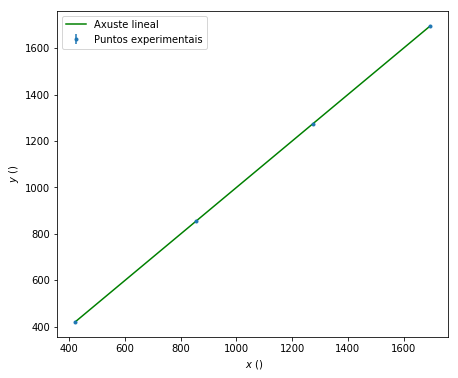

In [68]:
a,b,siga,sigb,r = ajustelinealponderado(x,y,uy)
display(Latex('$a$=%3.6f , $\sigma_{a}$=%3.6f' % (a,siga) ))
display(Latex('$b$=%3.6f , $\sigma_{b}$=%3.6f' % (b,sigb) ))
display(Latex('$r$=%.6f'%(r)))

Y= a + b*x
plt.figure(figsize=(7,6))
plt.errorbar(x, y, yerr=uy,fmt= '.',label="Puntos experimentais")
plt.plot(x,Y,'g-',label="Axuste lineal")
plt.legend(loc="upper left")
plt.xlabel(r' $x\ \mathrm{()} $')
plt.ylabel(r'$y\ \mathrm{()}$')
plt.savefig("fign.pdf")

## Ajuste no lineal

###### Test

<IPython.core.display.Latex object>

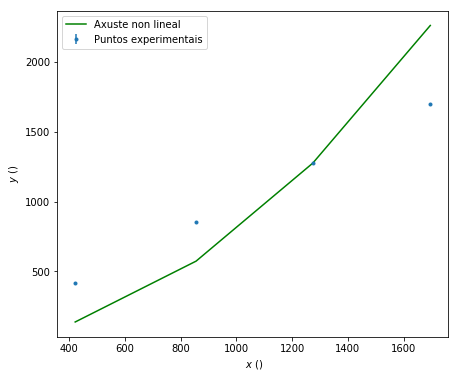

In [70]:
def fun(x,b): #aquí hay que trabajar en cada caso
    y = b*x**2/2
    return y

sol = so.curve_fit(fun,x,y,sigma=uy,absolute_sigma=True)

# La salida tiene dos arrays: sol[0] con los parámetros  
b = sol[0]

# y sol[1] con las incertidumbres. Ésta es una matriz de covarianza. Sí solo queremos las varianzas tomamos la diagonal
sb = np.sqrt(np.diag(sol[1]))

display(Latex('$b$=%3.6f , $\sigma_{b}$=%3.6f' % (b,sb) ))

yEst=fun(x,b)


plt.figure(figsize=(7,6))
plt.errorbar(x, y, yerr=uy,fmt= '.',label="Puntos experimentais")
plt.plot(x,yEst,'g-',label="Axuste non lineal")
plt.legend(loc="upper left")
plt.xlabel(r' $x\ \mathrm{()} $')
plt.ylabel(r'$y\ \mathrm{()}$')
plt.savefig("fign.pdf")